In [1]:
import numpy as np
import pandas as pd

In [2]:
import pandas as pd

encodings = ['utf-8','latin1','ISO-8859-1','cp1252']

file_path = 'spam.csv'

#To check encoding of CSV file
for encoding in encodings: 
    try:
        df = pd.read_csv(file_path,encoding=encoding)
        print(f"File Successfully read with encoding: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"Failed to read with encoding: {encoding}")
        continue

#To check if the csv file have been loaded with given encoding
if 'df' in locals(): 
    print("CSV file have been successfully loaded.")
else:
    print("All encoding attempts failed. Unable to read CSV file.")

Failed to read with encoding: utf-8
File Successfully read with encoding: latin1
CSV file have been successfully loaded.


In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5512,ham,"Just making dinner, you ?",NaN,NaN,NaN
5509,ham,Lol they were mad at first but then they woke ...,NaN,NaN,NaN
2058,ham,Ugh fuck it I'm resubbing to eve,NaN,NaN,NaN
4918,ham,Re your call; You didn't see my facebook huh?,NaN,NaN,NaN
578,spam,"our mobile number has won å£5000, to claim cal...",NaN,NaN,NaN


In [4]:
#ham is regular message & spam is unwanted message
df.shape

(5572, 5)

In [113]:
#5572 is the number of messages and 5 is the number of columns
# Actions:
# 1. Data cleaning
# 2. Exploratory Data Analysis
# 3. Data Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Website
# 7. Deploy

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# v1 & v2 is the important for us, so we are going to drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(8)

,v1,v2
1102,ham,Black shirt n blue jeans... I thk i c Ì_...
553,ham,Ok. Every night take a warm bath drink a cup o...
1807,ham,Do have a nice day today. I love you so dearly.
4200,ham,Wylie update: my weed dealer carlos went to fr...
4643,ham,Did u got that persons story
5023,ham,Where you. What happen
1887,spam,Urgent! Please call 09061743811 from landline....
4529,ham,Don't forget though that I love you .... And I...


In [9]:
#Renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(8)

,target,text
2661,ham,Do you know when dad will be back?
1171,spam,Got what it takes 2 take part in the WRC Rally...
4337,ham,Yes when is the appt again?
991,ham,Hi im having the most relaxing time ever! we h...
3683,ham,Dad says hurry the hell up
2561,ham,And maybe some pressies
2860,ham,I am not at all happy with what you saying or ...
838,spam,We tried to contact you re our offer of New Vi...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# ham changes to 0 & spam changes to 1

#check for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# no null values

#check for duplicate values
df.duplicated().sum()

403

In [15]:
# 403 duplicated values

#Remove duplicate values
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

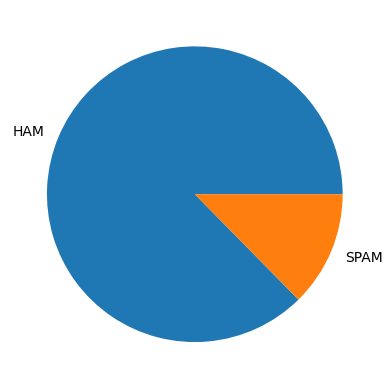

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['HAM','SPAM'])
plt.show()

In [20]:
# Data is not balanced as there are lot of normal messages as of to unwanted messages

import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Vedansh-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
df['num_characters'] = df['text'].apply(len)

In [23]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x))) # word count

In [25]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x))) # sentence count

In [27]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
#Targeting normal messages
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
#Targeting spam messages
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [31]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

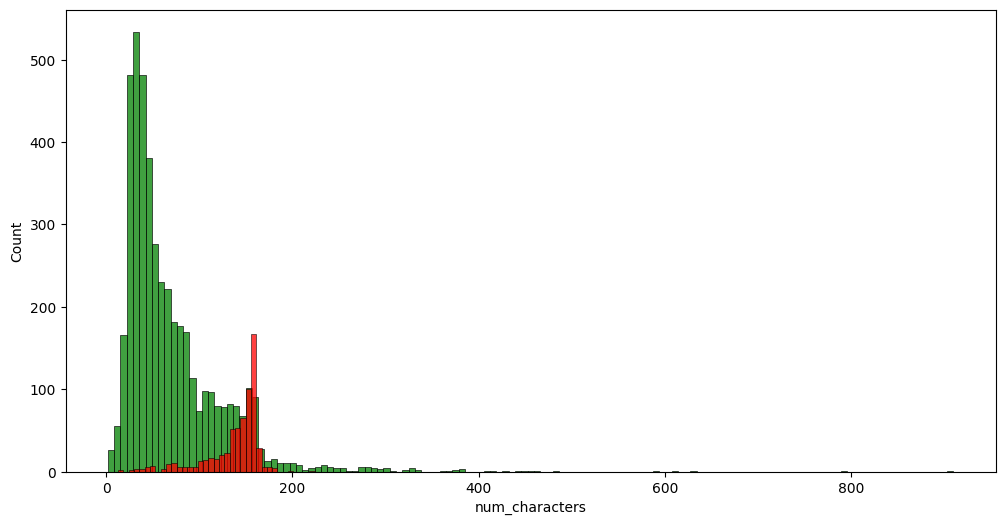

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'],color='green')
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

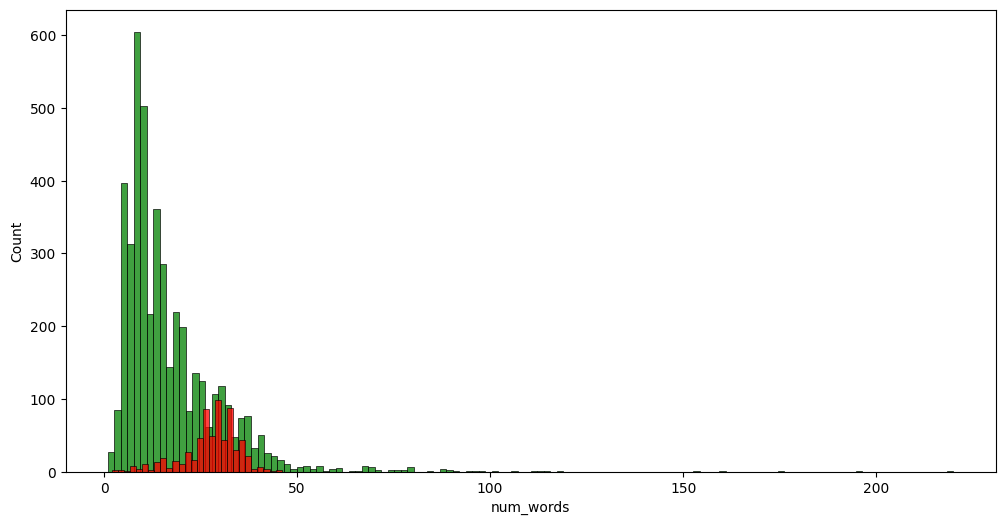

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'],color='green')
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

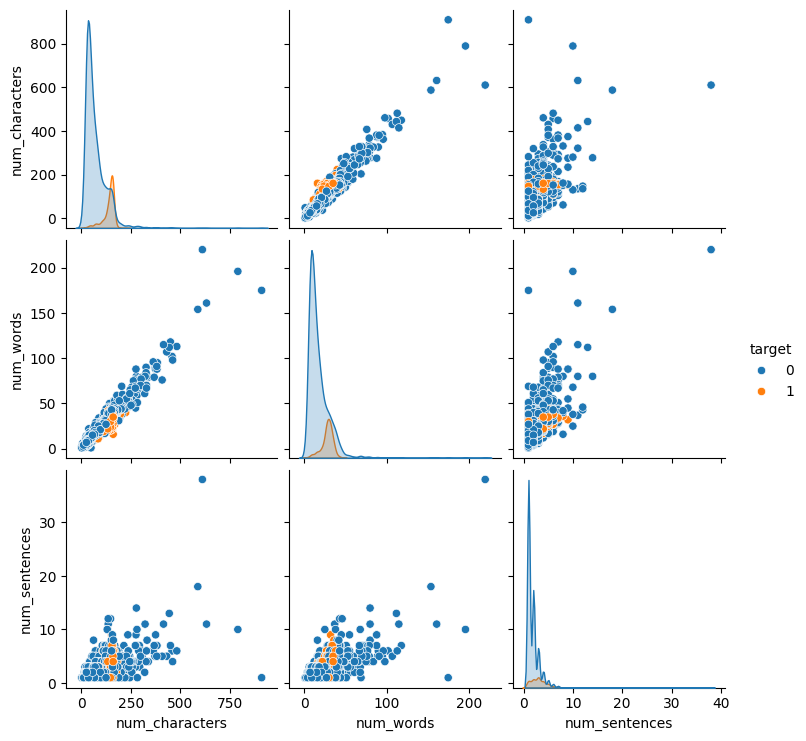

In [34]:
sns.pairplot(df,hue='target')

In [51]:
df[['target','num_characters','num_words','num_sentences']].corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


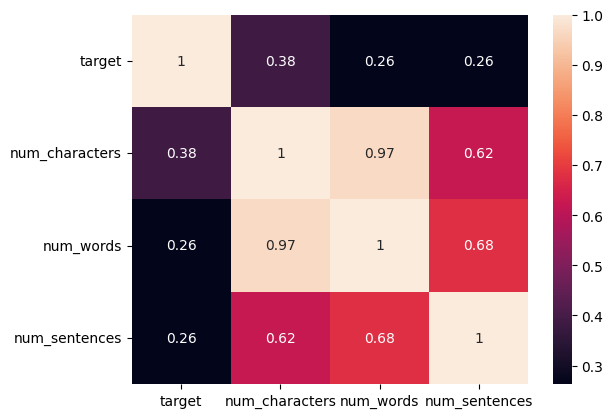

In [52]:
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(),annot=True) #HeatMap for better understanding
plt.show()

In [35]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Vedansh-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

transformed_text = transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")
print(transformed_text)

gon na home soon want talk stuff anymor tonight k cri enough today


In [37]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [38]:
ps.stem('running')

'run'

In [39]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


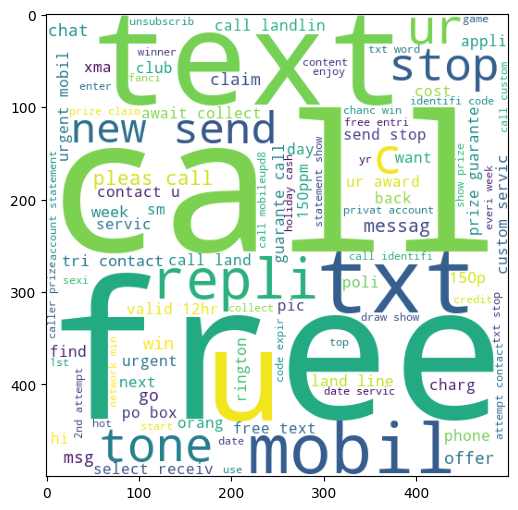

In [42]:
from wordcloud import WordCloud
wc = WordCloud(width = 500 , height = 500 , min_font_size = 10 , background_color = 'white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

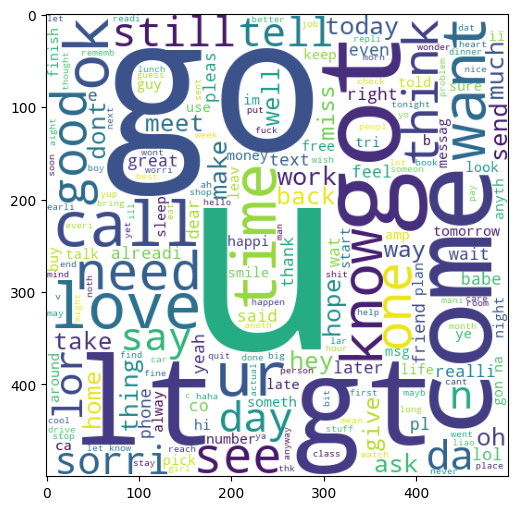

In [43]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [44]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [45]:
spam_corpus = []  #To find total number of words in spam messages
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

len(spam_corpus)

9939

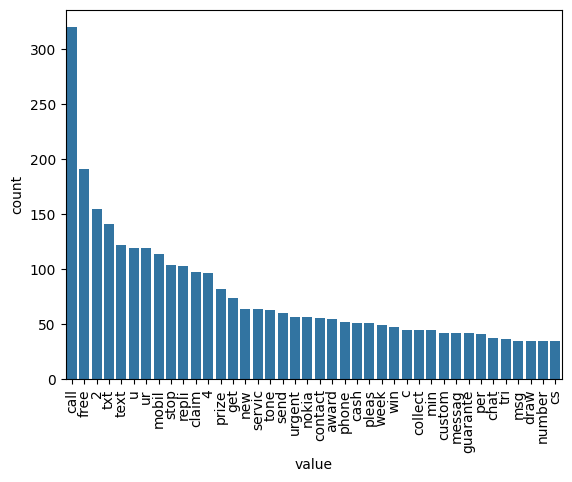

In [57]:
from collections import Counter

spam_data = pd.DataFrame(Counter(spam_corpus).most_common(40), columns=['value','count'])
sns.barplot(x = 'value' , y = 'count' , data=spam_data)
plt.xticks(rotation='vertical')
plt.show()

In [56]:
ham_corpus = []  #To find total number of words in normal messages
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

len(ham_corpus)

35404

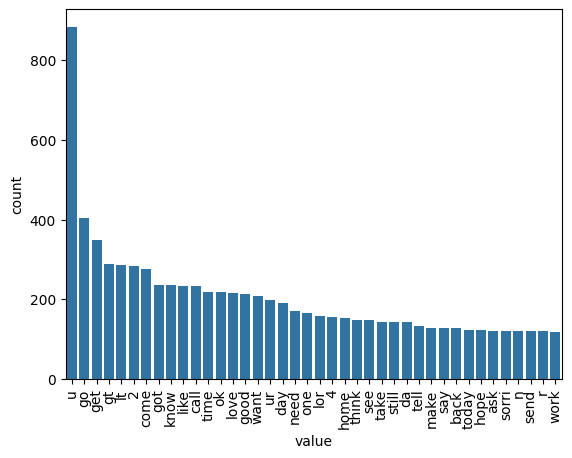

In [58]:
ham_data = pd.DataFrame(Counter(ham_corpus).most_common(40), columns=['value','count'])
sns.barplot(x = 'value' , y = 'count' , data=ham_data)
plt.xticks(rotation='vertical')
plt.show()

In [59]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [66]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [67]:
x.shape

(5169, 3000)

In [96]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train , X_test , Y_train , Y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [71]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

gnb.fit(X_train,Y_train)
Y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [72]:
mnb.fit(X_train,Y_train)
Y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))
print(precision_score(Y_test,Y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [73]:
bnb.fit(X_train,Y_train)
Y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [85]:
# Gaussian Naive Bayes has accuracy of 86% and Precision score 50%
# Multinomial Naive Bayes has accuracy of 97% and Precision score 100%
# Bernoulli Naive Bayes has accuracy of 98% and Precision score 99%

# We will use Multinomial Naive Bayes with TFid

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [102]:
#Creating Object
X_train , X_test , Y_train , Y_test = train_test_split(x,y,test_size=0.2,random_state=2)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear' , penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)

In [103]:
classifiers = {
    'KN':knc,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc
}

In [104]:
def train_classifier(classifier,X_train,Y_train,X_test,Y_test):
    classifier.fit(X_train,Y_train)
    Y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(Y_test,Y_pred)
    precision = precision_score(Y_test,Y_pred)
    return accuracy,precision

In [107]:
train_classifier(lrc,X_train , Y_train , X_test , Y_test)

(0.9584139264990329, 0.9702970297029703)

In [110]:
accuracy_scores = []
precision_scores = []

for name,classifier in classifiers.items():
    current_accuracy ,current_precision = train_classifier(classifier,X_train , Y_train , X_test , Y_test)

    print("For: ",name)
    print("Accuracy: ",current_accuracy)
    print("Precision: ",current_precision,"\n")

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For:  KN
Accuracy:  0.9052224371373307
Precision:  1.0 

For:  DT
Accuracy:  0.9274661508704062
Precision:  0.8118811881188119 

For:  LR
Accuracy:  0.9584139264990329
Precision:  0.9702970297029703 

For:  RF
Accuracy:  0.9758220502901354
Precision:  0.9829059829059829 



In [112]:
performance_df = pd.DataFrame({'algorithm': classifiers.keys() , 'Accuracy': accuracy_scores , 'Precision': precision_scores})
performance_df.sort_values('Precision',ascending=False)

,algorithm,Accuracy,Precision
0,KN,0.905222,1.000000
3,RF,0.975822,0.982906
2,LR,0.958414,0.970297
1,DT,0.927466,0.811881


In [114]:
import pickle # for serialization

pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))